In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("./Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:-1]  # 選取除最後一列以外的所有列
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [17]:
y = dataset.iloc[:, -1].to_frame() # 選取最後一列作為y
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X_df = pd.DataFrame(X, columns=['Level']) # ndarray轉dataframe
y_df = pd.DataFrame(y, columns=['Salary']) # ndarray轉dataframe

X_df

,Level
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078
5,0.174078
6,0.522233
7,0.870388
8,1.218544
9,1.566699


## Training the SVR model 
- kernel='rbf' 表示使用徑向基核函數 (Radial Basis Function) 來處理非線性資料。這是 SVR 最常用的核函數。

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\33313\.conda\envs\openai\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [20]:
# 1. 將新輸入數據標準化
scaled_input = sc_X.transform([[6.5]])

# 2. 使用模型進行預測
scaled_prediction = regressor.predict(scaled_input)

# 3. 將一維陣列轉換為二維陣列
reshaped_prediction = scaled_prediction.reshape(-1, 1)

# 4. 反標準化以獲得原始數據範圍的預測值
final_prediction = sc_y.inverse_transform(reshaped_prediction)

print(final_prediction)  # 最終結果

[[252789.13921624]]


## Visualising the SVR results

C:\Users\33313\AppData\Local\Temp\ipykernel_28824\1412826726.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


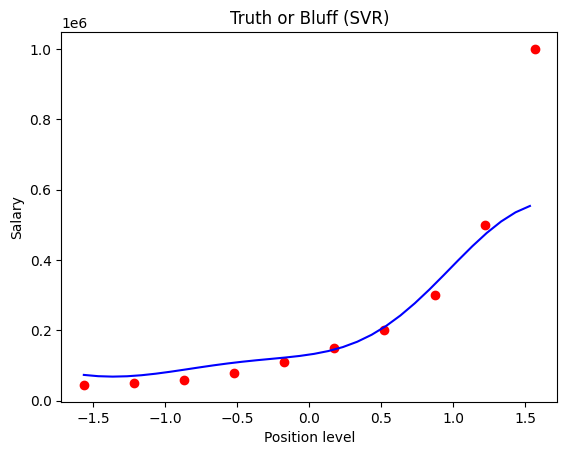

In [21]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()